In [2]:
import os
import sys
import pandas as pd
import geopandas as gpd
from tqdm import tqdm
import pandas as pd
from tqdm import tqdm
import numpy as np
from scipy.stats import pearsonr, spearmanr
from datetime import datetime
import pandas as pd
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from importlib import reload
import matplotlib.pyplot as plt
import calplot

In [3]:
sys.path.append("../../src")
import main

In [6]:
year = 'year'
var = 'BuAre_sum'
radius = 300

In [7]:
temp = pd.read_csv('../../data/processed_data/temp_synoptic_controls_2024.csv')

In [8]:
stats_dict = pd.read_csv(f'../../data/processed_data/2024/stats_timesteps_BuAre_sum_year_300.csv')
stats_dict['Time'] = pd.to_datetime(stats_dict['Time'])

date_to_fraction_of_day = temp.set_index('datetime_UTC')['fraction_of_day'].to_dict()
day_to_fraction_of_night = temp.set_index('datetime_UTC')['fraction_of_night'].to_dict()
stats_dict['fraction_of_day'] = stats_dict['Time'].astype(str).map(date_to_fraction_of_day)
stats_dict['fraction_of_night'] = stats_dict['Time'].astype(str).map(day_to_fraction_of_night)

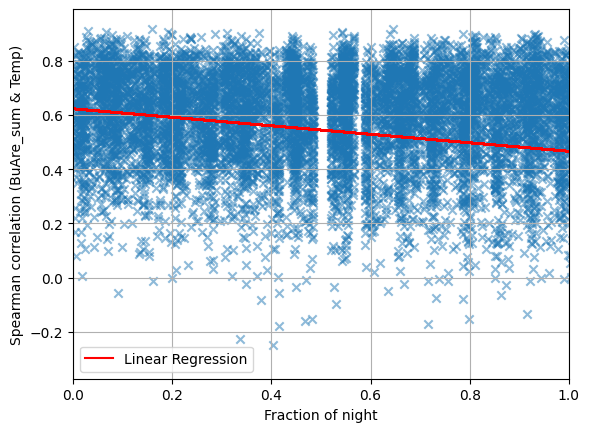

In [9]:
plt.scatter(stats_dict['fraction_of_night'],stats_dict['Spearman Correlation'], alpha=0.5, marker='x')
plt.xlim(0,1)
plt.grid()
plt.xlabel('Fraction of night')
plt.ylabel('Spearman correlation (BuAre_sum & Temp)')

# Add linear regression line
x = np.array(stats_dict['fraction_of_night'])
y = np.array(stats_dict['Spearman Correlation'])
m, b = np.polyfit(x, y, 1)  # Linear regression (slope and intercept)
plt.plot(x, m * x + b, color='red', label='Linear Regression')

plt.legend()

In [10]:
# remove rows with Spearman p-value <= 0.05
stats_dict_sig = stats_dict[stats_dict['Spearman p-value'] <= 0.05]

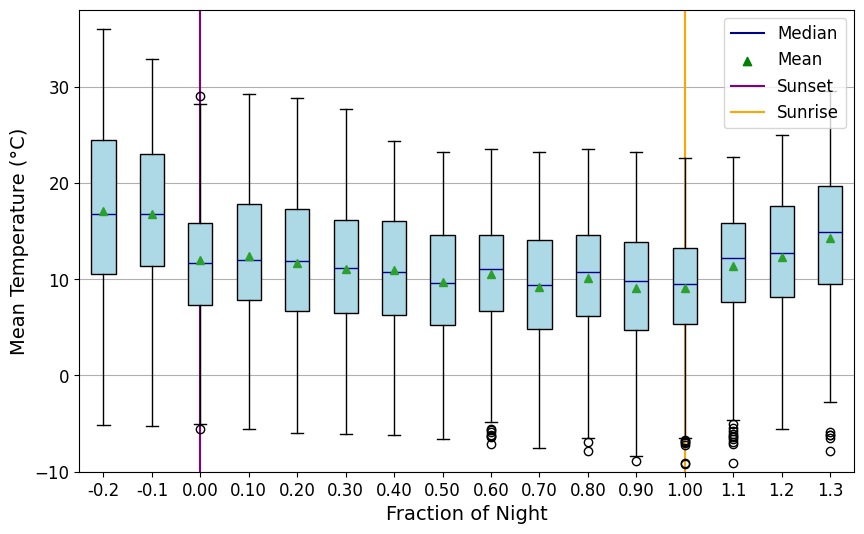

In [11]:
#boxplot for fraction of night
sc=[]
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.9)) & (stats_dict['fraction_of_day'] > (0.8))), 'Temp. Mean'])
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (1)) & (stats_dict['fraction_of_day'] > (0.9))), 'Temp. Mean'])
for i in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    sc.append(stats_dict.loc[((stats_dict['fraction_of_night'] <= (i+0.05)) & (stats_dict['fraction_of_night'] > (i-0.05))), 'Temp. Mean'])
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.1)) & (stats_dict['fraction_of_day'] > (0))), 'Temp. Mean'])
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.2)) & (stats_dict['fraction_of_day'] > (0.1))), 'Temp. Mean'])
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.3)) & (stats_dict['fraction_of_day'] > (0.2))), 'Temp. Mean'])

plt.figure(figsize=(10, 6))

plt.plot([3, 3], [-10, 38], color='purple', linestyle='-', label='Sunset')
sunset = plt.Line2D([0], [0], color='purple', linestyle='-', label='Sunset')
plt.plot([13, 13], [-10, 38], color='orange', linestyle='-', label='Sunrise')
sunrise = plt.Line2D([0], [0], color='orange', linestyle='-', label='Sunrise')

boxplot = plt.boxplot(sc,showmeans=True, patch_artist=True,)
for box in boxplot['boxes']:
    box.set(facecolor='lightblue')

# Set the color of the median lines to dark blue
for median in boxplot['medians']:
    median.set(color='darkblue')


# Custom legend handles
mean_handle = plt.Line2D([], [], color='darkblue', linestyle='-', label='Median')
median_handle = plt.scatter([], [], color='green', linestyle='-', label='Mean', marker='^')


plt.ylabel('Mean Temperature (°C)', fontsize=14)
plt.xlabel('Fraction of Night', fontsize=14)
plt.xticks(ticks=np.arange(1, len(sc) + 1), labels=['-0.2', '-0.1'] + [f'{i:.2f}' for i in np.arange(0, 1.05, 0.1)] + ['1.1', '1.2', '1.3'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.ylim(-10,38)

plt.legend(handles=[mean_handle, median_handle, sunset, sunrise], loc='upper right', fontsize=12)
plt.savefig('../../figures/fig9/fraction_of_night_temp_mean.png', bbox_inches='tight', dpi=300)
plt.savefig('../../figures/fig9/fraction_of_night_temp_mean.svg', bbox_inches='tight', dpi=300)
plt.savefig('../../figures/fig9/fraction_of_night_temp_mean.pdf', bbox_inches='tight', dpi=300)
plt.show()

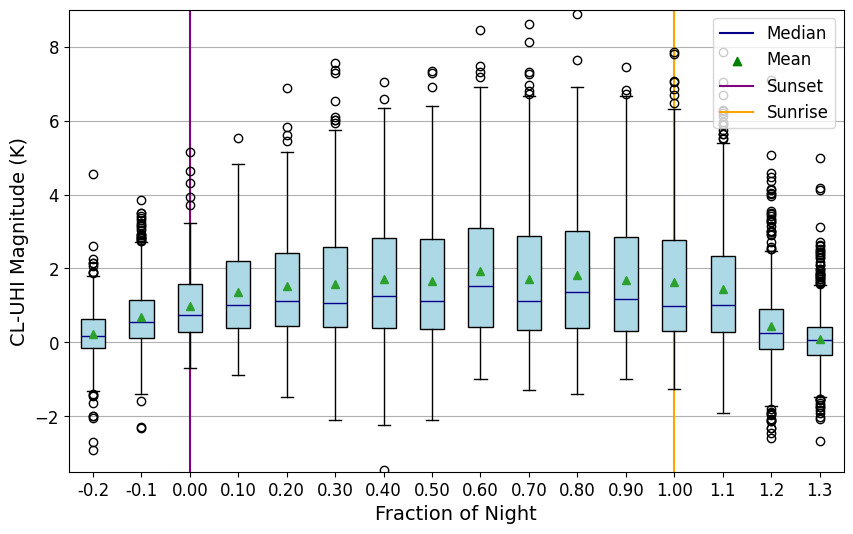

In [63]:
#boxplot for fraction of night
sc=[]
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.9)) & (stats_dict['fraction_of_day'] > (0.8))), 'UHI Magnitude'].dropna())
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (1)) & (stats_dict['fraction_of_day'] > (0.9))), 'UHI Magnitude'].dropna())
for i in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    sc.append(stats_dict.loc[((stats_dict['fraction_of_night'] <= (i+0.05)) & (stats_dict['fraction_of_night'] > (i-0.05))), 'UHI Magnitude'].dropna())
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.1)) & (stats_dict['fraction_of_day'] > (0))), 'UHI Magnitude'].dropna())
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.2)) & (stats_dict['fraction_of_day'] > (0.1))), 'UHI Magnitude'].dropna())
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.3)) & (stats_dict['fraction_of_day'] > (0.2))), 'UHI Magnitude'].dropna())

plt.figure(figsize=(10, 6))

plt.plot([3, 3], [-10, 10], color='purple', linestyle='-', label='Sunset')
sunset = plt.Line2D([0], [0], color='purple', linestyle='-', label='Sunset')
plt.plot([13, 13], [-10, 10], color='orange', linestyle='-', label='Sunrise')
sunrise = plt.Line2D([0], [0], color='orange', linestyle='-', label='Sunrise')

boxplot = plt.boxplot(sc,showmeans=True, patch_artist=True,)
for box in boxplot['boxes']:
    box.set(facecolor='lightblue')

# Set the color of the median lines to dark blue
for median in boxplot['medians']:
    median.set(color='darkblue')


# Custom legend handles
mean_handle = plt.Line2D([], [], color='darkblue', linestyle='-', label='Median')
median_handle = plt.scatter([], [], color='green', linestyle='-', label='Mean', marker='^')


plt.ylabel('CL-UHI Magnitude (K)', fontsize=14)
plt.xlabel('Fraction of Night', fontsize=14)
plt.xticks(ticks=np.arange(1, len(sc) + 1), labels=['-0.2', '-0.1'] + [f'{i:.2f}' for i in np.arange(0, 1.05, 0.1)] + ['1.1', '1.2', '1.3'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.ylim(-3.5,9)

plt.legend(handles=[mean_handle, median_handle, sunset, sunrise], loc='upper right', fontsize=12)
plt.savefig('../../figures/fig9/fraction_of_night_uhi_mag_1211.png', bbox_inches='tight', dpi=300)
plt.savefig('../../figures/fig9/fraction_of_night_uhi_mag_1211.svg', bbox_inches='tight', dpi=300)
plt.savefig('../../figures/fig9/fraction_of_night_uhi_mag_1211.pdf', bbox_inches='tight', dpi=300)
plt.show()

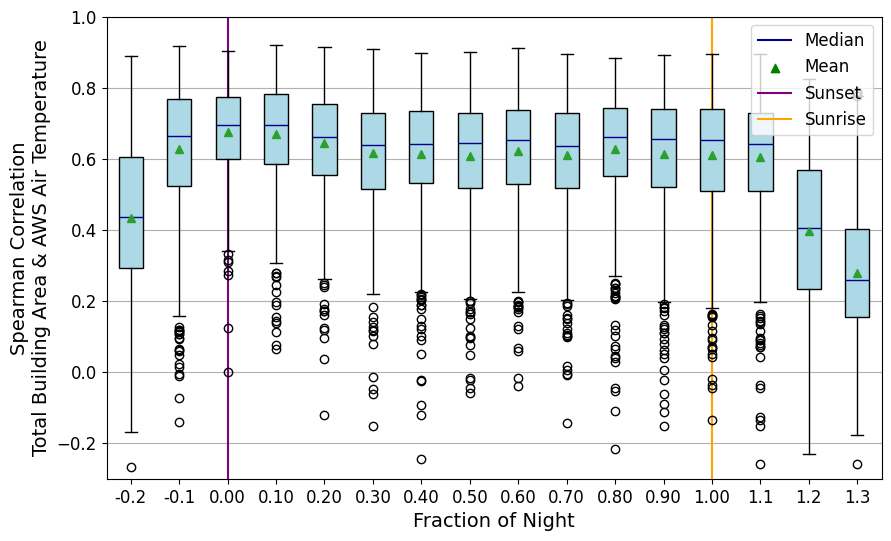

In [48]:
#boxplot for fraction of night
sc=[]
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.9)) & (stats_dict['fraction_of_day'] > (0.8))), 'Spearman Correlation'])
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (1)) & (stats_dict['fraction_of_day'] > (0.9))), 'Spearman Correlation'])
for i in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    sc.append(stats_dict.loc[((stats_dict['fraction_of_night'] <= (i+0.05)) & (stats_dict['fraction_of_night'] > (i-0.05))), 'Spearman Correlation'])
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.1)) & (stats_dict['fraction_of_day'] > (0))), 'Spearman Correlation'])
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.2)) & (stats_dict['fraction_of_day'] > (0.1))), 'Spearman Correlation'])
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.3)) & (stats_dict['fraction_of_day'] > (0.2))), 'Spearman Correlation'])

plt.figure(figsize=(10, 6))

plt.plot([3, 3], [-1, 1], color='purple', linestyle='-', label='Sunset')
sunset = plt.Line2D([0], [0], color='purple', linestyle='-', label='Sunset')
plt.plot([13, 13], [-1, 1], color='orange', linestyle='-', label='Sunrise')
sunrise = plt.Line2D([0], [0], color='orange', linestyle='-', label='Sunrise')

boxplot = plt.boxplot(sc,showmeans=True, patch_artist=True,)
for box in boxplot['boxes']:
    box.set(facecolor='lightblue')

# Set the color of the median lines to dark blue
for median in boxplot['medians']:
    median.set(color='darkblue')


# Custom legend handles
mean_handle = plt.Line2D([], [], color='darkblue', linestyle='-', label='Median')
median_handle = plt.scatter([], [], color='green', linestyle='-', label='Mean', marker='^')


plt.ylabel('Spearman Correlation\nTotal Building Area & AWS Air Temperature', fontsize=14)
plt.xlabel('Fraction of Night', fontsize=14)
plt.xticks(ticks=np.arange(1, len(sc) + 1), labels=['-0.2', '-0.1'] + [f'{i:.2f}' for i in np.arange(0, 1.05, 0.1)] + ['1.1', '1.2', '1.3'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y')
plt.ylim(-0.3,1)

plt.legend(handles=[mean_handle, median_handle, sunset, sunrise], loc='upper right', fontsize=12)
plt.savefig('../../figures/fig9/fraction_of_night_spearman.png', bbox_inches='tight', dpi=300)
plt.savefig('../../figures/fig9/fraction_of_night_spearman.svg', bbox_inches='tight', dpi=300)
plt.savefig('../../figures/fig9/fraction_of_night_spearman.pdf', bbox_inches='tight', dpi=300)
plt.show()

<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: SyntaxWarning: invalid escape sequence '\i'
<>:121: Synt

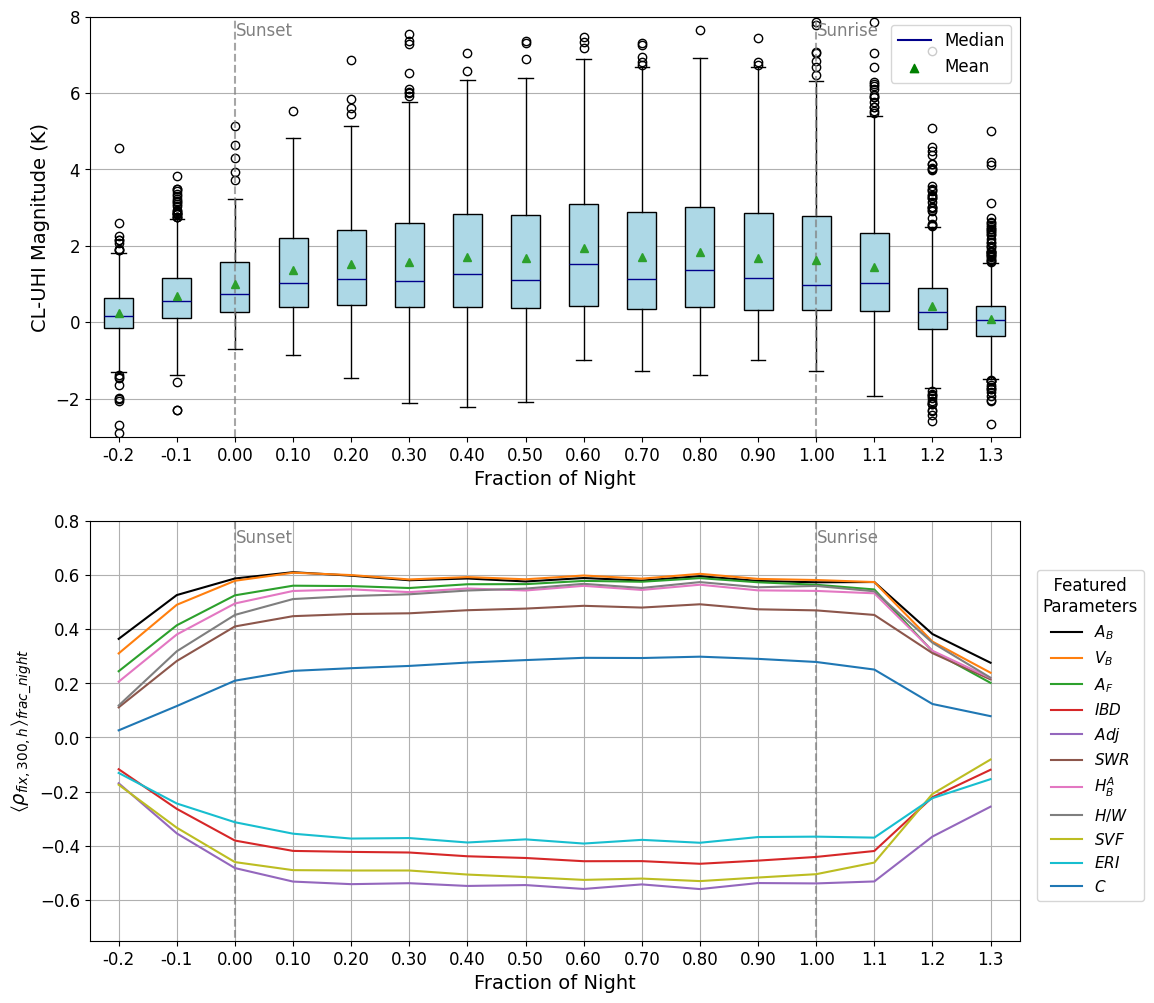

In [152]:
stats_dict = pd.read_csv(f'/Users/lisawink/Documents/paper1/data/processed_data/calplot_data/{var}_300_fraction_of_night.csv')
stats_dict = pd.read_csv(f"/Users/lisawink/Documents/paper1/data/processed_data/2024/stats_timesteps_{var}_year_300.csv")

stats_dict['Time'] = pd.to_datetime(stats_dict['Time'])

date_to_fraction_of_day = temp.set_index('datetime_UTC')['fraction_of_day'].to_dict()
day_to_fraction_of_night = temp.set_index('datetime_UTC')['fraction_of_night'].to_dict()
stats_dict['fraction_of_day'] = stats_dict['Time'].astype(str).map(date_to_fraction_of_day)
stats_dict['fraction_of_night'] = stats_dict['Time'].astype(str).map(day_to_fraction_of_night)

#boxplot for fraction of night
sc=[]
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.9)) & (stats_dict['fraction_of_day'] > (0.8))), 'UHI Magnitude'].dropna())
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (1)) & (stats_dict['fraction_of_day'] > (0.9))), 'UHI Magnitude'].dropna())
for i in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
    sc.append(stats_dict.loc[((stats_dict['fraction_of_night'] <= (i+0.05)) & (stats_dict['fraction_of_night'] > (i-0.05))), 'UHI Magnitude'].dropna())
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.1)) & (stats_dict['fraction_of_day'] > (0))), 'UHI Magnitude'].dropna())
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.2)) & (stats_dict['fraction_of_day'] > (0.1))), 'UHI Magnitude'].dropna())
sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.3)) & (stats_dict['fraction_of_day'] > (0.2))), 'UHI Magnitude'].dropna())

fig, ax = plt.subplots(2, 1, figsize=(12, 12))

boxplot = ax[0].boxplot(sc,showmeans=True, patch_artist=True,)
for box in boxplot['boxes']:
    box.set(facecolor='lightblue')

# Set the color of the median lines to dark blue
for median in boxplot['medians']:
    median.set(color='darkblue')

ax[0].plot([3, 3], [-3, 8], color='grey', linestyle='--',alpha=0.7)
ax[0].plot([13, 13], [-3, 8], color='grey', linestyle='--',alpha=0.7)
#add sunset and sunrise label to plot
ax[0].text(3.02, 7.5, 'Sunset', color='grey', fontsize=12)
ax[0].text(13.02, 7.5, 'Sunrise', color='grey', fontsize=12)

# Custom legend handles
#mean_handle = ax[0].Line2D([], [], color='darkblue', linestyle='-', label='Median')
#median_handle = ax[0].scatter([], [], color='green', linestyle='-', label='Mean', marker='^')

ax[0].set_ylabel('CL-UHI Magnitude (K)', fontsize=14)
ax[0].set_xlabel('Fraction of Night', fontsize=14)
ax[0].set_xticks(ticks=np.arange(1, len(sc) + 1), labels=['-0.2', '-0.1'] + [f'{i:.2f}' for i in np.arange(0, 1.05, 0.1)] + ['1.1', '1.2', '1.3'], fontsize=12)
#ax[0].set_yticks(fontsize=12)
ax[0].tick_params(axis='both', which='major', labelsize=12)
ax[0].grid(axis='y')
ax[0].set_ylim(-3,8)
#plt.ylim(-3.5,9)

ax[0].legend(handles=[mean_handle, median_handle], loc='upper right', fontsize=12)

##############################

ax[1].plot([3, 3], [-1, 1], color='grey', linestyle='--',alpha=0.7)
ax[1].plot([13, 13], [-1, 1], color='grey', linestyle='--',alpha=0.7)
#add sunset and sunrise label to plot
ax[1].text(3.02, 0.72, 'Sunset', color='grey', fontsize=12)
ax[1].text(13.02, 0.72, 'Sunrise', color='grey', fontsize=12)

linestyle_mapping = {
    'BuAre_sum': '-',
    'BuVol_3D_sum': '-',
    'BuEWA_3D_sum': '-',
    'BuIBD':'-',
    'BuAdj':'-',
    'BuSWR_3D_median':'-',
    'BuHt_wmean': '-',
    'StrHW_median': '-',
    'SVF_3D_mean': '-',
    'BuERI_mode': '-',
    'StrClo400_median': '-'
}

color_mapping = {
    'BuAre_sum': 'black',
    'BuVol_3D_sum': 'tab:orange',
    'BuEWA_3D_sum': 'tab:green',
    'BuIBD':'tab:red',
    'BuAdj':'tab:purple',
    'BuSWR_3D_median':'tab:brown',
    'BuHt_wmean': 'tab:pink',
    'StrHW_median': 'tab:gray',
    'SVF_3D_mean': 'tab:olive',
    'BuERI_mode': 'tab:cyan',
    'StrClo400_median': 'tab:blue'
}
lines_in_loop = []
for var in ['BuAre_sum','BuVol_3D_sum','BuEWA_3D_sum','BuIBD','BuAdj','BuSWR_3D_median','BuHt_wmean','StrHW_median','SVF_3D_mean','BuERI_mode','StrClo400_median']:
    stats_dict = pd.read_csv(f'/Users/lisawink/Documents/paper1/data/processed_data/calplot_data/{var}_300_fraction_of_night.csv')
    stats_dict = pd.read_csv(f"/Users/lisawink/Documents/paper1/data/processed_data/2024/stats_timesteps_{var}_year_300.csv")

    stats_dict['Time'] = pd.to_datetime(stats_dict['Time'])

    date_to_fraction_of_day = temp.set_index('datetime_UTC')['fraction_of_day'].to_dict()
    day_to_fraction_of_night = temp.set_index('datetime_UTC')['fraction_of_night'].to_dict()
    stats_dict['fraction_of_day'] = stats_dict['Time'].astype(str).map(date_to_fraction_of_day)
    stats_dict['fraction_of_night'] = stats_dict['Time'].astype(str).map(day_to_fraction_of_night)

    #boxplot for fraction of night
    sc=[]
    sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.9)) & (stats_dict['fraction_of_day'] > (0.8))), 'Spearman Correlation'])
    sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (1)) & (stats_dict['fraction_of_day'] > (0.9))), 'Spearman Correlation'])
    for i in [0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1]:
        sc.append(stats_dict.loc[((stats_dict['fraction_of_night'] <= (i+0.05)) & (stats_dict['fraction_of_night'] > (i-0.05))), 'Spearman Correlation'])
    sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.1)) & (stats_dict['fraction_of_day'] > (0))), 'Spearman Correlation'])
    sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.2)) & (stats_dict['fraction_of_day'] > (0.1))), 'Spearman Correlation'])
    sc.append(stats_dict.loc[((stats_dict['fraction_of_day'] <= (0.3)) & (stats_dict['fraction_of_day'] > (0.2))), 'Spearman Correlation'])


    mean = [np.mean(i) for i in sc]
    line, = plt.plot(np.arange(1, len(mean) + 1), mean, color=color_mapping[var], label=var, linestyle=linestyle_mapping[var])
    lines_in_loop.append(line)
    plt.xticks(ticks=np.arange(1, len(sc) + 1), labels=['-0.2', '-0.1'] + [f'{i:.2f}' for i in np.arange(0, 1.05, 0.1)] + ['1.1', '1.2', '1.3'], fontsize=12)
    
plt.yticks(fontsize=12)
plt.ylim(-0.75,0.8)
plt.xlim(0.5,16.5)
plt.ylabel(r"$〈\rho_{fix,300,h}〉_{frac\_night}$", fontsize=14)
plt.xlabel('Fraction of Night', fontsize=14)
plt.grid()
custom_labels = ['$\it{A_B}$','$\it{V_B}$','$\it{A_F}$','$\it{IBD}$', '$\it{Adj}$', '$\it{SWR}$', '$\it{H_B^A}$', '$\it{H/W}$', '$\it{SVF}$', '$\it{ERI}$', '$\it{C}$']
plt.legend(handles=lines_in_loop,labels=custom_labels,prop={'size': 11}, bbox_to_anchor=(1.01, 0.9), loc='upper left', title='  Featured\nParameters', title_fontsize=12)

plt.savefig('../../figures/fig9/fraction_of_night_uhi_mag_comb.png', bbox_inches='tight', dpi=300)
plt.savefig('../../figures/fig9/fraction_of_night_uhi_mag_combcomb.svg', bbox_inches='tight', dpi=300)
plt.savefig('../../figures/fig9/fraction_of_night_uhi_mag_comb.pdf', bbox_inches='tight', dpi=300)
plt.show()